In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
dataset = pd.read_csv('Dentistry Dataset.csv')
dataset.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [4]:
#Dropping Column Sample ID as there is no data and Sl No as it is just the sample number
dataset.drop(['Sample ID','Sl No'], axis=1, inplace=True)

In [5]:
dataset['Gender'].value_counts()

,count
Gender,
Female,550
Male,550


In [6]:
#Binary encoding for gender column
dataset["Gender"] = dataset["Gender"].map({"Male": 0, "Female": 1})
dataset['Gender'].value_counts()

,count
Gender,
1,550
0,550


In [7]:
#Splitting data into dependent and independent variable
x=dataset.drop('Gender', axis=1)
y=dataset['Gender']
print(x.shape, y.shape)

(1100, 11) (1100,)


In [8]:
#Normalize data in x
from sklearn.preprocessing import Normalizer
norm=Normalizer()
x_norm=norm.fit_transform(x)
x_norm

array([[0.53936387, 0.56318578, 0.56296104, ..., 0.00543859, 0.00543859,
        0.00541611],
       [0.49575982, 0.58094037, 0.58116571, ..., 0.00534069, 0.00556603,
        0.00556603],
       [0.53997057, 0.55945646, 0.55945646, ..., 0.00582229, 0.00619792,
        0.00619792],
       ...,
       [0.56255031, 0.54544878, 0.54544878, ..., 0.00612055, 0.00612055,
        0.00612055],
       [0.48779774, 0.57769189, 0.57769189, ..., 0.00613231, 0.006202  ,
        0.006202  ],
       [0.52715664, 0.56176562, 0.56176562, ..., 0.00593624, 0.00632588,
        0.00632588]])

In [9]:
# Convert back x_norm to DataFrame
x = pd.DataFrame(x_norm, columns=x.columns)

In [10]:
x.head()

,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,0.539364,0.563186,0.562961,0.136639,0.136639,0.136864,0.137088,0.005439,0.005439,0.005439,0.005416
1,0.495760,0.580940,0.581166,0.138137,0.138137,0.142644,0.142644,0.005341,0.005341,0.005566,0.005566
2,0.539971,0.559456,0.559456,0.138749,0.139923,0.147435,0.147435,0.005822,0.005822,0.006198,0.006198
3,0.455873,0.595370,0.595370,0.138585,0.138585,0.149526,0.149526,0.005288,0.005288,0.005698,0.005698
4,0.452767,0.596746,0.597878,0.137867,0.137867,0.147149,0.147149,0.005229,0.005229,0.005569,0.005569


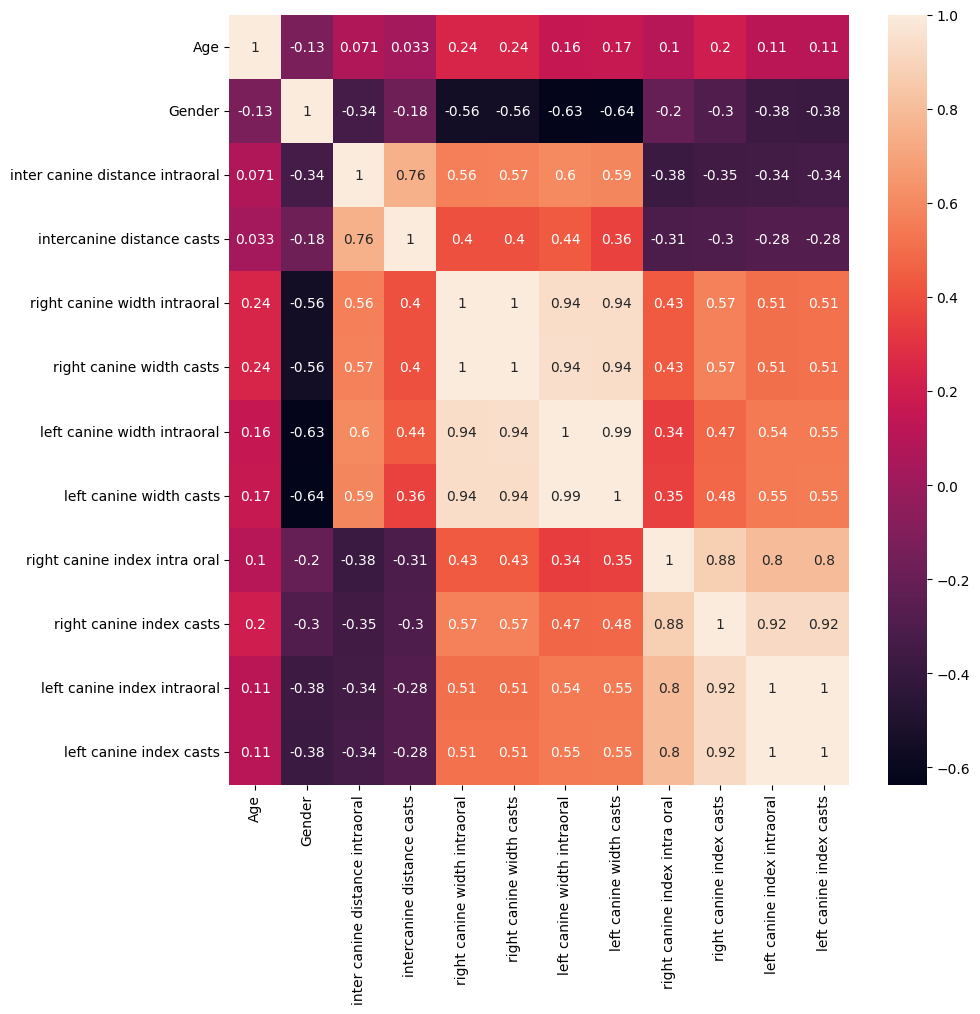

In [11]:
#Plotting heat map to check correlation between x and y
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

The heatmap shows correlations between features.
* inter canine distance intraoral and intercanine distance casts
* right canine width intraoral and right canine width casts
* left canine width intraoral and left canine width casts
* right canine index intra oral and right canine index casts
* left canine index intraoral and left canine index casts

Since the above pairs are highly correlated to each, we will drop one feature from each pair.

In [12]:
#Dropping one feature from each pair
x.drop(['inter canine distance intraoral', 'right canine width intraoral', 'left canine width intraoral', 'right canine index intra oral', 'left canine index intraoral'], axis=1, inplace=True)
x.head()

,Age,intercanine distance casts,right canine width casts,left canine width casts,right canine index casts,left canine index casts
0,0.539364,0.562961,0.136639,0.137088,0.005439,0.005416
1,0.495760,0.581166,0.138137,0.142644,0.005341,0.005566
2,0.539971,0.559456,0.139923,0.147435,0.005822,0.006198
3,0.455873,0.595370,0.138585,0.149526,0.005288,0.005698
4,0.452767,0.597878,0.137867,0.147149,0.005229,0.005569


In [13]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [14]:
#Splitting the data into Train and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
#Using logistic regression to train the model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [16]:
from sklearn.metrics import accuracy_score
y_pred_lr = lr.predict(x_test)

from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_pred_lr)
cm_lr

array([[89, 18],
       [60, 53]])

In [17]:
lr.score(x_test, y_test)

0.6454545454545455

In [18]:
#Using Decsion Tree Classifier to train the model
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred_dt = dt.predict(x_test)
cm_dt=confusion_matrix(y_test,y_pred_dt)
cm_dt

array([[96, 11],
       [19, 94]])

In [20]:
dt.score(x_test, y_test)

0.8636363636363636

In [21]:
#USing Random Forest Classifier to train model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [22]:
y_pred_rf = rf.predict(x_test)
cm_rf=confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[ 92,  15],
       [ 10, 103]])

In [23]:
rf.score(x_test, y_test)

0.8863636363636364

In [24]:
# Using XGBoost Classifier to train model
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
y_pred_xgb = xgb.predict(x_test)
cm_xgb=confusion_matrix(y_test,y_pred_xgb)
cm_xgb

array([[ 95,  12],
       [ 11, 102]])

In [26]:
xgb.score(x_test, y_test)

0.8954545454545455

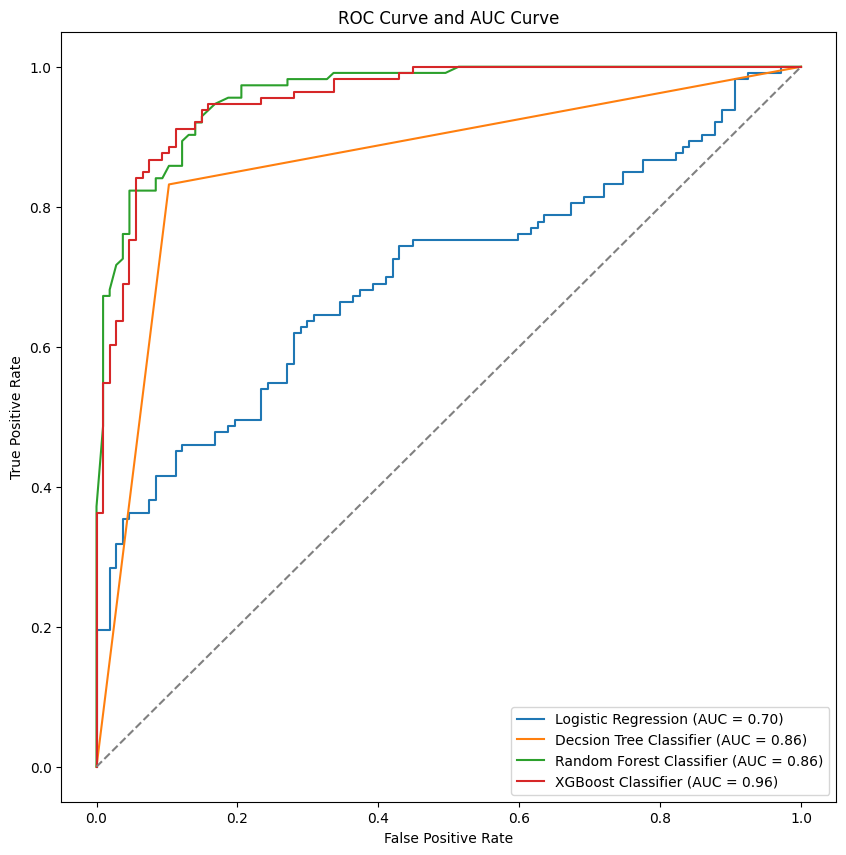

In [27]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))

# ROC curve and AUC score for Logistic Regression
# Get probability predictions
y_probs_lr = lr.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC Curve
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")



# ROC curve and AUC score for Decsion Tree Classifier
# Get probability predictions
y_probs_dt = dt.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.plot(fpr_dt, tpr_dt, label=f"Decsion Tree Classifier (AUC = {auc_dt:.2f})")



# ROC curve and AUC score for Random Forest Classifier
# Get probability predictions for Random Forest Classifier
y_probs_rf = rf.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score for Random Forest Classifier
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve for Random Forest Classifier
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest Classifier (AUC = {auc_dt:.2f})")



# ROC curve and AUC score for XGBoost Classifier
# Get probability predictions for XGBoost Classifier
y_probs_xgb = xgb.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC score for XGBoost Classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC Curve for XGBoost Classifier
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost Classifier (AUC = {auc_xgb:.2f})")


# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

#Displayign Plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve and AUC Curve")
plt.legend()
plt.show()

# Conclusion
* The ROC Curve shows that the XGBoost Classifier has the highest AUC score, indicating the best model performance.
* The model is now ready for deployment or further optimization with advanced tuning.